In [29]:
# Importamos las librerias que vamos a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import re

In [30]:
# Creamos una lista de los campos de búsqueda
campos_busqueda = ['kw', 'au', 'mc-itype', 'ti', 'an', 'itype', 'su', 'BC', 'bc', 'callnum', 
    'I-format', 'AU', 'YE', 'an', 'se', 'In', 'bx', 'se', 'su-to', 'mc-itype,phr', 'l-format', 'Provider']

# Creamos una expresión regular para conectar los campos
pattern = r'\b(?:' + '|'.join(campos_busqueda) + r')\b'

# Funcion para extraer el campo de cada fila
def extraer_campo(texto):
    match = re.search(pattern, texto)
    return match.group(0) if match else None

In [31]:
# Abrimos el archivo 'Estadisticas consultas catálogo-reportresults.csv'
data_frame = pd.read_csv("d:/Users/Laura/Desktop/Espacio Integrador II/3 - Practica Academica/Practica-Acad-mica/datos/Estadísticas consultas catálogo-reportresults.csv", sep=';')

### Estrucutura del archivo
##### Primer contacto con el archivo

In [32]:
# Vemos los primeros datos del archivo
data_frame.head()

,sessionid,query_desc,type,total,time,branchcode,categorycode
0,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: bronzino",biblio,16,2018-10-17 15:27:49,FING,DOCENTE
1,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: bronzino",biblio,16,2018-10-17 15:28:25,FING,DOCENTE
2,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",biblio,10,2018-10-17 15:29:51,FING,DOCENTE
3,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",biblio,10,2018-10-17 15:30:02,FING,DOCENTE
4,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",biblio,10,2018-10-17 15:30:13,FING,DOCENTE


In [33]:
# Consultamos los tipos de variable de cada columna
print(data_frame.dtypes)

sessionid       object
query_desc      object
type            object
total            int64
time            object
branchcode      object
categorycode    object
dtype: object


In [34]:
# Vemos las medidas estadisticas basicas para la variable 'total'
estadisticas = data_frame['total'].describe()
print("Estadísticas descriptivas de la columna 'total':")
estadisticas

Estadísticas descriptivas de la columna 'total':


count     2535.000000
mean       190.157791
std        820.385073
min          0.000000
25%          2.000000
50%          7.000000
75%         33.000000
max      11525.000000
Name: total, dtype: float64

In [35]:
# Nos fijamos la cantidad de veces que el sistema no encontró ningun material con la busqueda ingresada por el usuario
cero_resultados = data_frame[data_frame['total'] == 0]
print(f"Las búsquedas totales que no tuvieron ningun resultado son: {len(cero_resultados)}")

porcentaje_cero_resultados = len(cero_resultados) / len(data_frame)
print(f"Esto representa un porcentaje del {round(porcentaje_cero_resultados, 2)} %")

Las búsquedas totales que no tuvieron ningun resultado son: 317
Esto representa un porcentaje del 0.13 %


In [36]:
# Buscamos el valor maximo de resultados que logro devolver el sistema
max_resultados = data_frame['total'].max()
print(f"Máximo de resultados que encontró el sistema: {max_resultados}")

# Encontramos el usuario que realizo esta busqueda
usuario_max_resultados = data_frame[data_frame['total'] == max_resultados]
usuario_max_resultados

Máximo de resultados que encontró el sistema: 11525


,sessionid,query_desc,type,total,time,branchcode,categorycode
1394,7a7a070b4c157d901bc30c69555b7dfa,"kw,wrdl: c++,",biblio,11525,2022-11-01 11:30:25,FING,BIBLIOTECA


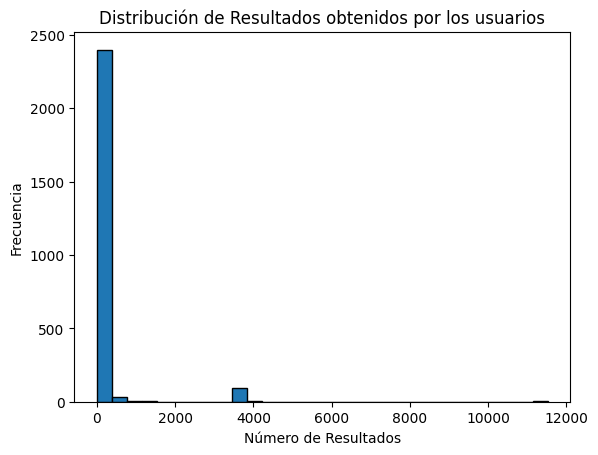

In [37]:
# Histograma de la columna 'total'
plt.hist(data_frame['total'], bins=30, edgecolor='black')
plt.title('Distribución de Resultados obtenidos por los usuarios')
plt.xlabel('Número de Resultados')
plt.ylabel('Frecuencia')
plt.show()

### Identificación de las variables más importantes y exploración de los datos
##### Se identificarán las variables que ayudarán a resolver nuestro problema. Además de hacer una exploración de los datos que nos brinde más información sobre los datos

In [49]:
# Filtramos el data frame, nos quedaremos con las variables que resolverán nuestro problema
df_filtrado = data_frame[['sessionid', 'query_desc','total','time']]
df_filtrado.head()

# Hacemos una copia del data frame filtrado para poder trabajar en otras ramas
df_auxiliar = df_filtrado.copy()

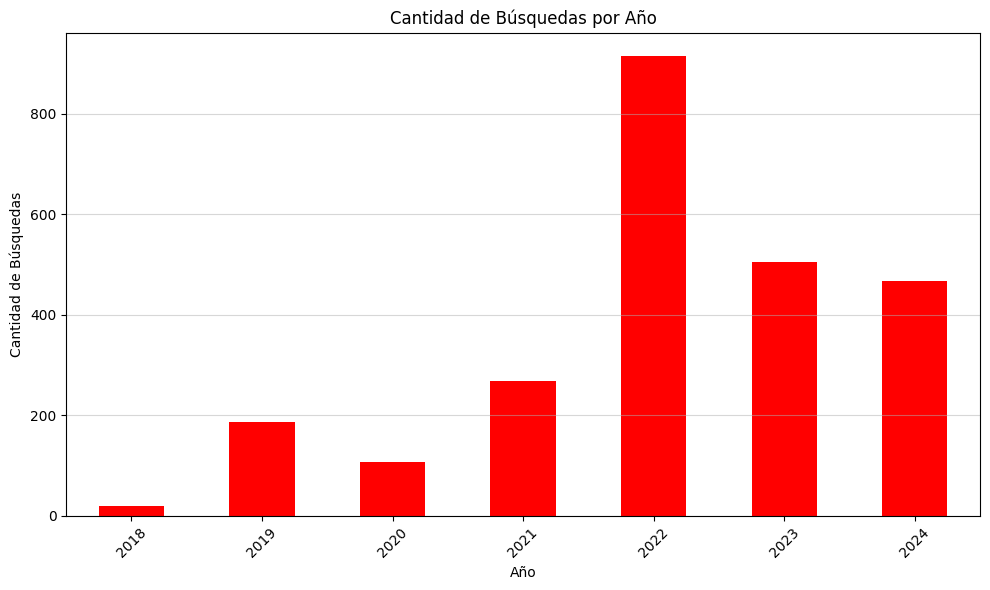

In [50]:
# Pasamos el 'time' de la busqueda a formato tiempo para extraer el año y contabilizarlos
df_auxiliar['time'] = pd.to_datetime(df_filtrado['time'])
df_auxiliar['año'] = df_auxiliar['time'].dt.year

total_busquedas = df_auxiliar['año'].value_counts().sort_index()

# Grafico para el total de busquedas por año
plt.figure(figsize=(10, 6))
total_busquedas.plot(kind='bar', color='red')
plt.title('Cantidad de Búsquedas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Búsquedas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

In [51]:
# Buscamos el usuario con más búsquedas dentro del sistema
maximo_usuario_busqueda = df_auxiliar['sessionid'].value_counts().sort_index()
print("El usuario con más busquedas en el sistema es: ")
maximo_usuario_busqueda[maximo_usuario_busqueda == maximo_usuario_busqueda.max()]

El usuario con más busquedas en el sistema es: 


sessionid
e03def7e497ec6c9bb60f290d5247dc8    49
Name: count, dtype: int64

In [52]:
cantidad_usuarios = df_auxiliar['sessionid'].nunique()
print("La cantidad de usuarios que hicieron una búsqueda en el sistema son:", cantidad_usuarios)

La cantidad de usuarios que hicieron una búsqueda en el sistema son: 853


### Etapa de limpieza

In [53]:
# Se eliminan los registros duplicados
data_frame = data_frame.drop_duplicates()

# Pasamos de tener 2535 cantidad de filas a tener 2470 registros, eliminando 65 resgistros duplicados

In [54]:
# Nos fijamos si las columnas tienen algún valor nulo
data_frame.info()

# Podemos observar que de las 2470 filas resultantes, ninguna posee valores nulos

<class 'pandas.core.frame.DataFrame'>
Index: 2470 entries, 0 to 2534
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sessionid     2470 non-null   object
 1   query_desc    2470 non-null   object
 2   type          2470 non-null   object
 3   total         2470 non-null   int64 
 4   time          2470 non-null   object
 5   branchcode    2470 non-null   object
 6   categorycode  2470 non-null   object
dtypes: int64(1), object(6)
memory usage: 154.4+ KB


In [55]:
# Buscamos las búsquedas que no tienen un campo ingresado
filas_sin_query = df_auxiliar[~ df_auxiliar['query_desc'].str.contains(pattern, na=False)]

if not filas_sin_query.empty:
    print(filas_sin_query)
else:
    print("Todas las filas contienen al menos un campo de búsqueda.")

                             sessionid query_desc  total                time  \
750   dd49ced56b003c9c8a33fa9cfcc93a55      robot     45 2022-03-23 17:34:00   
752   dd49ced56b003c9c8a33fa9cfcc93a55      robot     45 2022-03-23 17:35:00   
754   dd49ced56b003c9c8a33fa9cfcc93a55   da vinci      0 2022-03-23 17:36:00   
756   dd49ced56b003c9c8a33fa9cfcc93a55   robotica     13 2022-03-23 17:44:00   
1680  d2557d77b8fe1ac4f906d8c47743444a         ,       0 2023-04-28 12:31:00   

       año  
750   2022  
752   2022  
754   2022  
756   2022  
1680  2023  


In [56]:
# Imputamos las filas que no tienen campos ingresados
filas_sin_query['query_desc'] = filas_sin_query['query_desc'].replace('robot', 'kw: robot')
filas_sin_query['query_desc'] = filas_sin_query['query_desc'].replace('robotica', 'kw: robotica')
filas_sin_query['query_desc'] = filas_sin_query['query_desc'].replace('da vinci', 'au: da vinci')


filas_sin_query = filas_sin_query.drop(1680)

C:\Users\Laura\AppData\Local\Temp\ipykernel_7260\3558051169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filas_sin_query['query_desc'] = filas_sin_query['query_desc'].replace('robot', 'kw: robot')
C:\Users\Laura\AppData\Local\Temp\ipykernel_7260\3558051169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filas_sin_query['query_desc'] = filas_sin_query['query_desc'].replace('robotica', 'kw: robotica')
C:\Users\Laura\AppData\Local\Temp\ipykernel_7260\3558051169.py:4: SettingWithCopyWarning: 
A value

In [57]:
df_auxiliar = df_auxiliar.drop([750,752,754,756,1680])
df_auxiliar = pd.concat([df_auxiliar, filas_sin_query], axis=0, ignore_index=True)

### Preparación de los datos para el análisis estadístico

In [58]:
# Aplicar la función para crear una nueva columna 'campo_extraido'
df_auxiliar['campo_extraido'] = df_auxiliar['query_desc'].apply(extraer_campo)